In [ ]:
import requests

In [ ]:
result = requests.get('http://cbr.ru')
html = result.text

In [ ]:
html

In [ ]:
import re

In [ ]:
match = re.findall(r'mono-num">(\d+,\d+)', html)
print(match)
cost_per_euro_today = match[2]
cost_per_euro_tomorrow = match[3]
print(cost_per_euro_today, cost_per_euro_tomorrow)

['72,5048', '72,2216', '86,7012', '85,9943']
86,7012 85,9943


In [ ]:
html = '''
Курс евро на сегодня (15 января)
составляет 68,7514'''
re.search(r'Евро\D+(\d+,\d+)', html, re.IGNORECASE).group(1)

AttributeError: ignored

Цифра 15 останавливает поиск, так как мы нашли цифру, но после неё не идет запятая.

In [ ]:
re.search(r'Евро.*?(\d+,\d+)', html, re.IGNORECASE | re.DOTALL).group(1)

'68,7514'

In [ ]:
https://regex101.com/ для тренировок

In [ ]:
text = '''
Автомобиль с номером А123ВС77 подрезал автомобиль К654НЕ197, 
спровоцировав ДТП с участем ещё двух иномарок с номерами М542ОР777 и О007ОО77
'''

pattern = r'[АВЕКМНОРСТУХ]\d{3}[АВЕКМНОРСТУХ]{2}\d{2,3}'
re.findall(pattern, text)

['А123ВС77', 'К654НЕ197', 'М542ОР777', 'О007ОО77']

In [ ]:
nicknames = ['sU3r_h4XX0r', 'alёna', 'ivan ivanovich']
reg = re.compile(r'^\w+$', re.ASCII)
for nick in nicknames:
  print('{} nickname: {}'.format('valid' if reg.match(nick) else 'invalid',
                                 nick
  ))

valid nickname: sU3r_h4XX0r
invalid nickname: alёna
invalid nickname: ivan ivanovich


In [ ]:
text = (
    'Анна и Лена загорали на берегу океана, '
    'когда к ним подошли Яна, ПОЛИНА и Ильнар'
)

re.findall(r'\b[А-Я]\w*(?:на|НА)\b', text)

['Анна', 'Лена', 'Яна', 'ПОЛИНА']

?: в скобках означает, что содержимое скобок группируется, но не запоминается

In [ ]:
text = 'Как защитить металл от процесса коррозии?'

re.findall(r'(\w)\1', text)

['л', 'с', 'р', 'и']

In [ ]:
re.sub(r'а', '?', text)


'К?к з?щитить мет?лл от процесс? коррозии?'

In [ ]:
re.sub(r'(\w)\1', lambda r: r.group(0).upper(), text)

'Как защитить метаЛЛ от процеССа коРРозИИ?'

In [ ]:
re.sub(r'\b(\w*(\w)\2\w*)\b', r'[\1]', text)

'Как защитить [металл] от [процесса] [коррозии]?'

In [ ]:
text = '123 44 цифры нужно уменшить на 1'
re.sub(r'\d+', lambda r: str(int(r.group(0))-1), text)

'122 43 цифры нужно уменшить на 0'

Beautiful Soup

Пусть дан следующий html

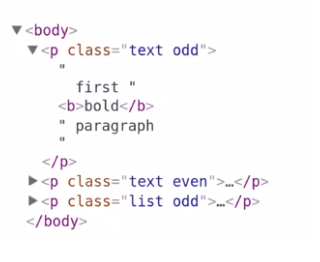

In [ ]:
from bs4 import BeautifulSoup


```
soup = BeautifulSoup(html, 'lxml')
soup.body.p.b.string # 'bold'
soup.p['class'] # ['text', 'odd']
soup('p')[1]['class'] # ['text', ['even']
```


In [ ]:
resp = requests.get('https://wikipedia.org')
html = resp.text

In [ ]:
re.findall(r'<a[^>]*other-project-link[^>]*href="([^"]*)', html)

['//commons.wikimedia.org/',
 '//www.wikivoyage.org/',
 '//www.wiktionary.org/',
 '//www.wikibooks.org/',
 '//www.wikinews.org/',
 '//www.wikidata.org/',
 '//www.wikiversity.org/',
 '//www.wikiquote.org/',
 '//www.mediawiki.org/',
 '//www.wikisource.org/',
 '//species.wikimedia.org/',
 '//meta.wikimedia.org/']

In [ ]:
soup = BeautifulSoup(html, 'lxml')
tags = soup('a', 'other-project-link')
[tag['href'] for tag in tags]

['//commons.wikimedia.org/',
 '//www.wikivoyage.org/',
 '//www.wiktionary.org/',
 '//www.wikibooks.org/',
 '//www.wikinews.org/',
 '//www.wikidata.org/',
 '//www.wikiversity.org/',
 '//www.wikiquote.org/',
 '//www.mediawiki.org/',
 '//www.wikisource.org/',
 '//species.wikimedia.org/',
 '//meta.wikimedia.org/']

Спарсим новости с сайта mail.ru

In [ ]:
result = requests.get('https://news.mail.ru')
html = result.text
soup = BeautifulSoup(html, 'lxml')

In [ ]:
[
 (section.string, 
  [
   link.string for link in section.find_parents()[4].find_all('span', 'link__text')
  ]
  ) for section in soup.find_all('span', 'hdr__inner')[:-3]
]

[('Политика',
  ['Путин поручил создать программу реабилитации для пациентов, переболевших COVID-19',
   'Ибрахим Раиси победил на выборах президента Ирана',
   'Блинкен обсудил с главой МИД Польши «угрозу» от «Северного потока-2»']),
 ('Экономика',
  ['В ГД хотят разрешить трем соседям составлять протоколы за шум по ночам',
   'Каждый второй клиент банков берет кредитки на всякий случай',
   'Взяли за спрос: эксперты назвали обогатившиеся в пандемию отрасли']),
 ('Общество',
  ['Коронавирус: вариант «Дельта» становится доминирующим во всем мире',
   'В Новоалтайске выпал град размером со сливу (фото)',
   'Школьницы из России завоевали четыре золота на олимпиаде по информатике']),
 ('События',
  ['Следователи проводят проверку по факту крушения самолета в Кемеровской области',
   'Количество погибших при крушении самолета в Кемеровской области выросло до семи',
   'Самолет потерпел крушение в Кемеровской области'])]

Теперь попробуем использовать API

API (application programming interface) — это посредник между разработчиком приложений и какой-либо средой, с которой это приложение должно взаимодействовать. API упрощает создание кода, поскольку предоставляет набор готовых классов, функций или структур для работы с имеющимися данными.

In [ ]:
resp = requests.get('http://www.cbr.ru/scripts/XML_daily.asp')
soup = BeautifulSoup(resp.content, 'xml')

In [ ]:
soup

<?xml version="1.0" encoding="utf-8"?>
<ValCurs Date="19.06.2021" name="Foreign Currency Market"><Valute ID="R01010"><NumCode>036</NumCode><CharCode>AUD</CharCode><Nominal>1</Nominal><Name>Австралийский доллар</Name><Value>54,5056</Value></Valute><Valute ID="R01020A"><NumCode>944</NumCode><CharCode>AZN</CharCode><Nominal>1</Nominal><Name>Азербайджанский манат</Name><Value>42,5083</Value></Valute><Valute ID="R01035"><NumCode>826</NumCode><CharCode>GBP</CharCode><Nominal>1</Nominal><Name>Фунт стерлингов Соединенного королевства</Name><Value>100,3808</Value></Valute><Valute ID="R01060"><NumCode>051</NumCode><CharCode>AMD</CharCode><Nominal>100</Nominal><Name>Армянских драмов</Name><Value>13,9410</Value></Valute><Valute ID="R01090B"><NumCode>933</NumCode><CharCode>BYN</CharCode><Nominal>1</Nominal><Name>Белорусский рубль</Name><Value>28,7415</Value></Valute><Valute ID="R01100"><NumCode>975</NumCode><CharCode>BGN</CharCode><Nominal>1</Nominal><Name>Болгарский лев</Name><Value>44,0295</Value

In [ ]:
soup.find('CharCode', text='EUR').find_next_sibling('Value').string

'85,9943'

In [ ]:
soup.find(ID='R01239').Value.string

'85,9943'

In [ ]:
resp = requests.get(
    'http://api.openweathermap.org/data/2.5/weather',
    params={
        'q': 'Moscow',
        'APPID': '37e655add78b23d166b81161c7834745',
        'mode': 'xml', 'units': 'metric'
    }
)
soup = BeautifulSoup(resp.content, 'xml')
soup.temperature['value']

'24.91'

In [ ]:
resp = requests.get(
    'http://api.openweathermap.org/data/2.5/weather',
    params={
        'q': 'Moscow',
        'APPID': '37e655add78b23d166b81161c7834745',
        'mode': 'json', 'units': 'metric'
    }
)
data = resp.json()
data['main']['temp']

24.91

API ВКонтакте

https://vk.com/dev/first_guide